In [1]:
from pymongo import MongoClient
import pandas as pd
from bson.objectid import ObjectId
import datetime
import time
import matplotlib.pylab as plt

connectionLocal = MongoClient('localhost', 27017)
db = connectionLocal.ETF_db
arbitragecollection = db.ArbitrageCollection
TradesData = db.TradesData

# Convert UTC to EST accounting for day light saving 
import pytz
est = pytz.timezone('US/Eastern')
utc = pytz.utc
fmt = '%Y-%m-%d %H:%M:%S %Z%z'

# Jupyter Notebook to display all the columns in a df
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

### Declare the ETF List name

In [2]:
# Create input for ETFs
listofetfs = ['XLK','VGT','IYW','FTEC']
dateOfAnalyis = datetime.datetime.strptime('2020-03-17','%Y-%m-%d')
year=dateOfAnalyis.year

### Load the ETF prices

In [3]:
def getHumanTime(ts=None, divideby=1000000000):
    s, ms = divmod(ts, divideby)
    return datetime.datetime(*time.gmtime(s)[:6])

etfpricesData={}
for etfname in listofetfs:
    prices = TradesData.find_one({"symbol":etfname, 'dateForData':dateOfAnalyis})
    priceDf = pd.DataFrame(prices['data'])
    priceDf['t'] = priceDf['t'].apply(lambda x: getHumanTime(ts=x, divideby=1000))
    priceDf = priceDf.rename(columns={'t':'Time','o':'Open','h':'High','c':'Close','l':'Low','v':'Volume'})
    priceDf = priceDf[['Time','Volume','vw','Open','Close','High','Low','n']]
    
    if dateOfAnalyis > datetime.datetime(year-1,9,1) and dateOfAnalyis < datetime.datetime(year,3,8):
        priceDf['Time']=priceDf['Time'] - datetime.timedelta(hours=5)
    else:
        priceDf['Time']=priceDf['Time'] - datetime.timedelta(hours=4)
        
    etfpricesData[etfname] = priceDf

### Load the arbitrage data

In [4]:
arbitrageData={}
for etfname in listofetfs:
    # Load data from Db
    etfdata = arbitragecollection.find_one({"ETFName":etfname, 'dateOfAnalysis':dateOfAnalyis})
    # Extract data from ETFdb and convert to pandas Df
    etfdata = pd.DataFrame(etfdata['data'])
    # Convert UTC time to E"ST time, Check if winter time - 5, Summer time - 4 
    if dateOfAnalyis > datetime.datetime(year-1,9,1) and dateOfAnalyis < datetime.datetime(year,3,8):
        etfdata['Time']=etfdata['Time'] - datetime.timedelta(hours=5)
    else:
        etfdata['Time']=etfdata['Time'] - datetime.timedelta(hours=4)
    arbitrageData[etfname] =etfdata

### Plot the etf data results

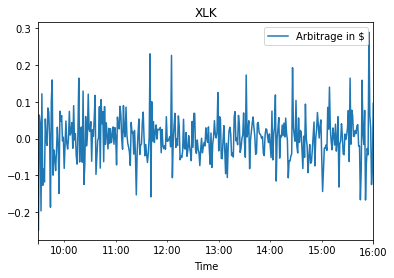

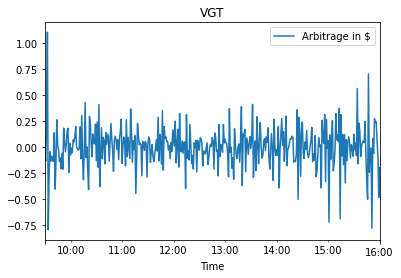

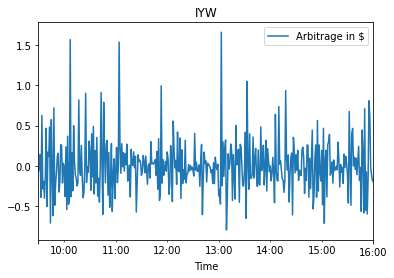

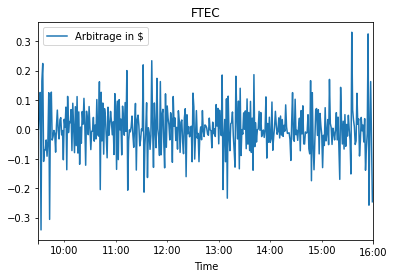

In [5]:
for i in listofetfs:
    arbitrageData[i].reset_index().plot(x='Time', y='Arbitrage in $',title=i)

In [6]:
arbitrageData['XLK'].sort_values('Arbitrage in $',ascending=False)

,Time,ETF Price,ETF Change Price %,Net Asset Value Change%,ETF Trading Spread in $,Arbitrage in $,Flag,ETFMover%1,ETFMover%2,ETFMover%3,ETFMover%4,ETFMover%5,ETFMover%6,ETFMover%7,ETFMover%8,ETFMover%9,ETFMover%10,Change%1,Change%2,Change%3,Change%4,Change%5,Change%6,Change%7,Change%8,Change%9,Change%10
385,2020-03-17 15:55:00,77.1678,0.729550,0.355340,0.014475,0.288769,111.0,"[AAPL, 0.0963]","[TXN, 0.0239]","[INTC, 0.0152]","[V, 0.0141]","[NVDA, 0.0135]","[CRM, 0.0128]","[CSCO, 0.0125]","[AVGO, 0.0106]","[CTSH, 0.0084]","[ADP, 0.0081]","[CTSH, 1.5989]","[QRVO, 1.5767]","[NLOK, 1.469]","[TXN, 1.2627]","[ANSS, 1.2096]","[FLT, 1.1519]","[WDC, 1.1495]","[ADI, 1.1482]","[FFIV, 1.1433]","[TEL, 0.972]"
130,2020-03-17 11:40:00,75.9113,0.369023,0.065746,0.010637,0.230221,111.0,"[AAPL, 0.0394]","[V, 0.0075]","[ADBE, 0.0055]","[CSCO, 0.0055]","[CRM, -0.0037]","[TXN, 0.0036]","[FIS, 0.0031]","[INTC, -0.003]","[AVGO, 0.0027]","[PYPL, 0.0027]","[WDC, -0.7889]","[FTNT, -0.5687]","[ADS, -0.5125]","[DXC, -0.3422]","[PAYC, -0.3377]","[LDOS, -0.3344]","[CTXS, 0.2713]","[KLAC, 0.2649]","[TEL, -0.2605]","[LRCX, 0.2533]"
155,2020-03-17 12:05:00,77.5371,0.465809,0.174617,0.010799,0.225782,111.0,"[AAPL, 0.0328]","[V, 0.0235]","[MA, 0.0195]","[CSCO, 0.0142]","[INTC, 0.0093]","[FIS, 0.0061]","[ORCL, 0.006]","[PYPL, 0.0058]","[QCOM, 0.0051]","[IBM, 0.0047]","[ADS, 0.6505]","[CSCO, 0.4942]","[WU, 0.4904]","[MA, 0.4843]","[FLT, 0.4726]","[GPN, 0.4589]","[V, 0.4562]","[FIS, 0.4537]","[TEL, 0.4308]","[DXC, 0.4117]"
296,2020-03-17 14:26:00,77.1248,0.583090,0.333337,0.011659,0.192621,111.0,"[AAPL, 0.058]","[INTC, 0.0289]","[V, 0.0229]","[CSCO, 0.0168]","[NVDA, 0.0152]","[MA, 0.0152]","[PYPL, 0.0133]","[ADBE, 0.0127]","[CRM, 0.0117]","[IBM, 0.01]","[AMAT, 0.8489]","[FLIR, 0.7929]","[PAYC, 0.7915]","[WDC, 0.7469]","[NTAP, 0.7078]","[KLAC, 0.6964]","[DXC, 0.6948]","[INTC, 0.6938]","[ZBRA, 0.6915]","[MU, 0.683]"
242,2020-03-17 13:32:00,75.6666,0.596400,0.368278,0.011785,0.172612,111.0,"[AAPL, 0.0995]","[MA, 0.0288]","[V, 0.0245]","[INTC, 0.0196]","[PYPL, 0.0174]","[CRM, 0.0163]","[NVDA, 0.016]","[CSCO, 0.012]","[ADBE, 0.0103]","[IBM, 0.0089]","[BR, 0.9406]","[ZBRA, 0.8436]","[PYPL, 0.791]","[LDOS, 0.7753]","[MA, 0.7138]","[CRM, 0.7114]","[ANSS, 0.6645]","[NOW, 0.6424]","[NVDA, 0.6294]","[INTU, 0.6219]"
363,2020-03-17 15:33:00,76.4541,0.449601,0.234798,0.012279,0.164226,111.0,"[AAPL, 0.0875]","[V, 0.0248]","[INTC, 0.0168]","[NVDA, 0.0141]","[ORCL, 0.0102]","[ADBE, 0.0094]","[MA, 0.0071]","[CRM, 0.0068]","[CSCO, 0.0066]","[FIS, 0.0046]","[BR, 1.1789]","[NVDA, 0.5561]","[ORCL, 0.5248]","[V, 0.481]","[AAPL, 0.4341]","[MSI, 0.4178]","[INTC, 0.4041]","[FIS, 0.3468]","[ADP, 0.3322]","[ADBE, 0.3266]"
47,2020-03-17 10:17:00,73.4625,0.576522,0.353068,0.016348,0.164155,111.0,"[AAPL, 0.1043]","[V, 0.0235]","[CSCO, 0.0189]","[ADBE, 0.017]","[MA, 0.017]","[INTC, 0.0158]","[ORCL, 0.0152]","[PYPL, 0.0126]","[NVDA, 0.0118]","[ACN, 0.0114]","[ADS, 0.9022]","[ORCL, 0.7859]","[XRX, 0.6964]","[CSCO, 0.6584]","[ADI, 0.6497]","[AMD, 0.6258]","[CDW, 0.6056]","[ACN, 0.5989]","[ADBE, 0.5904]","[PYPL, 0.5766]"
16,2020-03-17 09:46:00,73.6068,0.676494,0.460143,0.025660,0.159249,111.0,"[AAPL, 0.0786]","[INTC, 0.0443]","[CSCO, 0.0294]","[V, 0.0265]","[ACN, 0.0229]","[MA, 0.019]","[TXN, 0.0184]","[ADBE, 0.0175]","[IBM, 0.0173]","[PYPL, 0.0167]","[DXC, 1.7017]","[CDNS, 1.3001]","[MCHP, 1.2085]","[ACN, 1.1978]","[SWKS, 1.0865]","[AMD, 1.0689]","[INTC, 1.0663]","[CSCO, 1.0233]","[ADP, 1.0224]","[AKAM, 1.0181]"
377,2020-03-17 15:47:00,77.4478,0.453317,0.248606,0.012190,0.158545,111.0,"[AAPL, 0.0584]","[NVDA, 0.022]","[ADBE, 0.0182]","[MA, 0.0181]","[V, 0.0177]","[CSCO, 0.0171]","[INTC, 0.0118]","[IBM, 0.0068]","[AVGO, 0.0065]","[ORCL, 0.0047]","[XRX, 1.2589]","[PAYC, 1.1093]","[FTNT, 0.9519]","[NVDA, 0.8653]","[CDNS, 0.7828]","[IPGP, 0.7788]","[IT, 0.6716]","[NLOK, 0.6511]","[ADBE, 0.6319]","[CSCO, 0.5958]"
339,2020-03-17 15:09:00,76.3504,0.571814,0.388716,0.017515,0.139796,111.0,"[AAPL, 0.1174]",

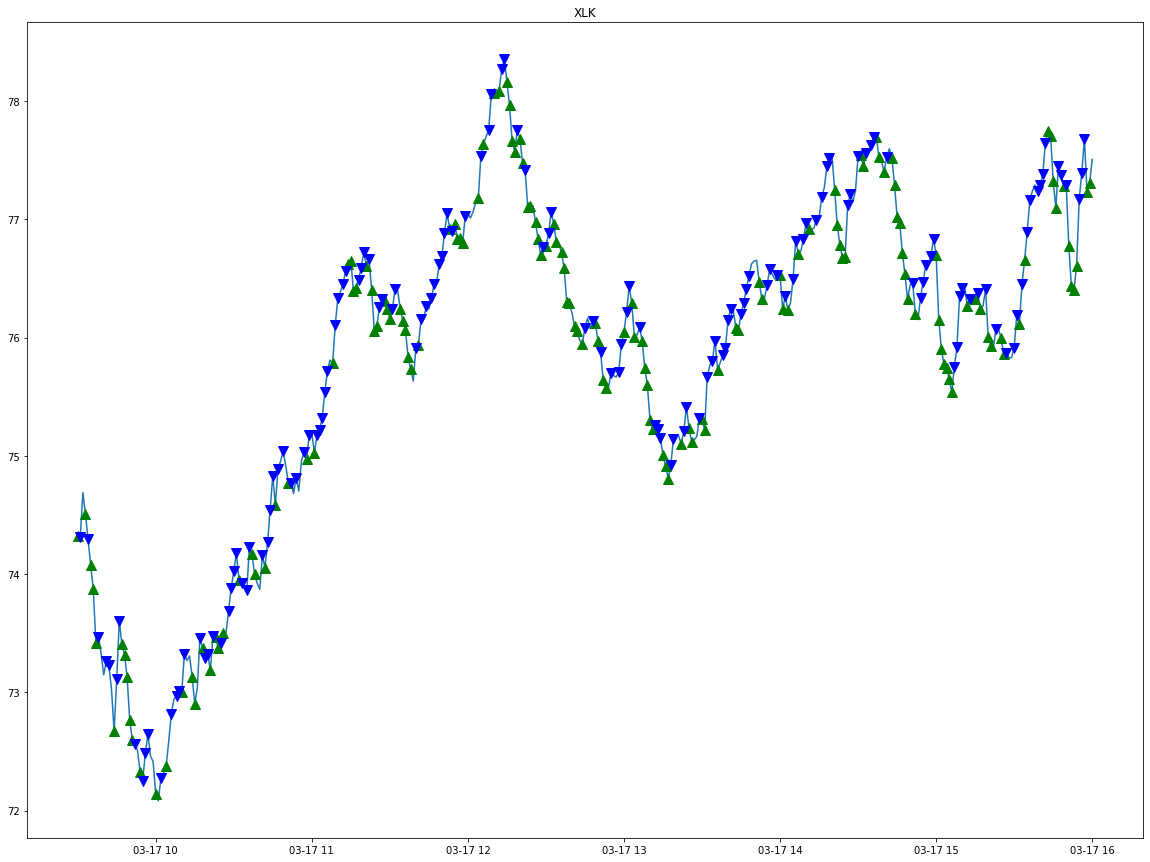

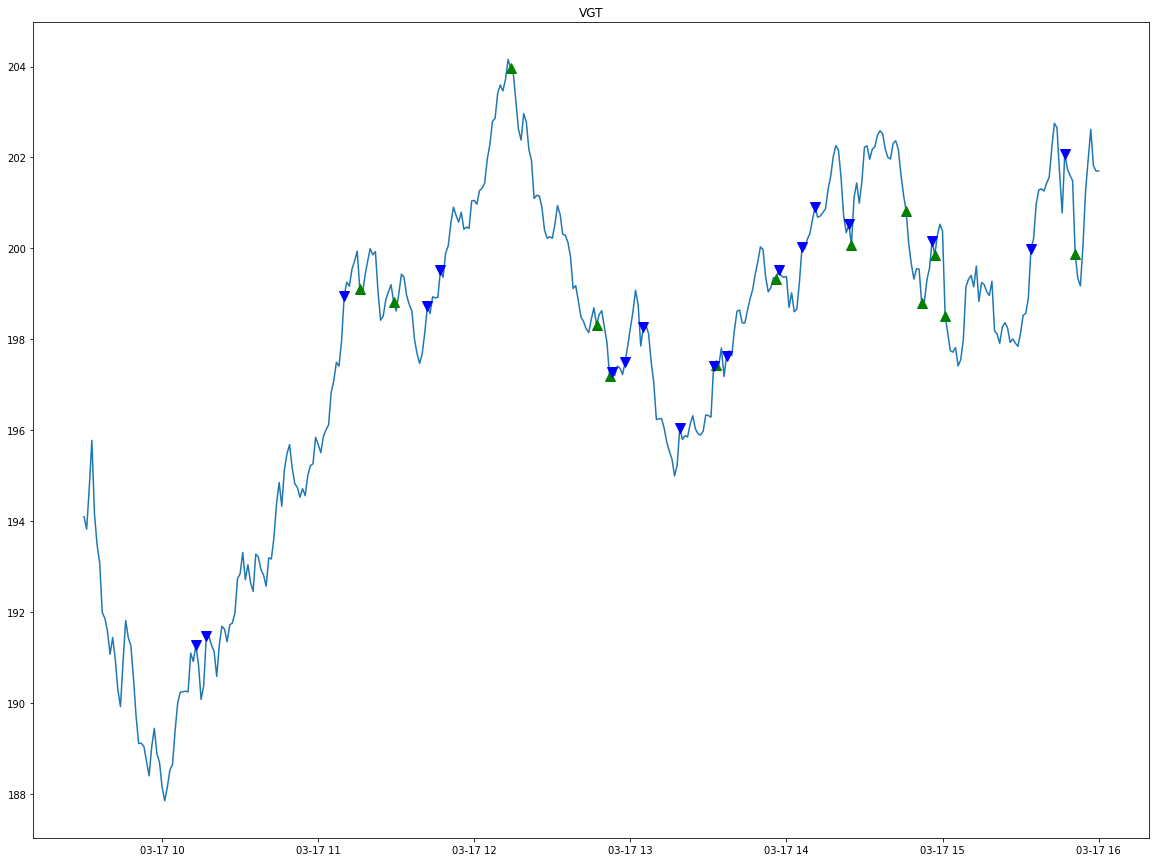

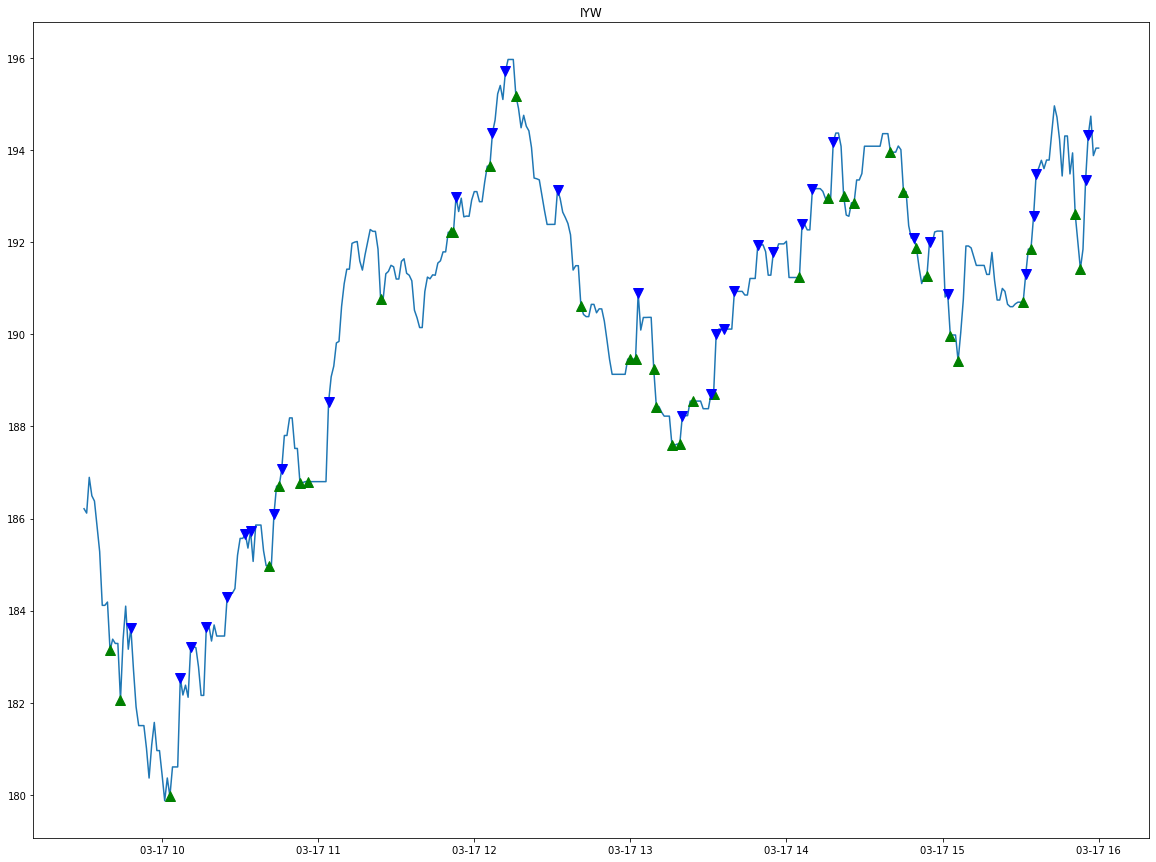

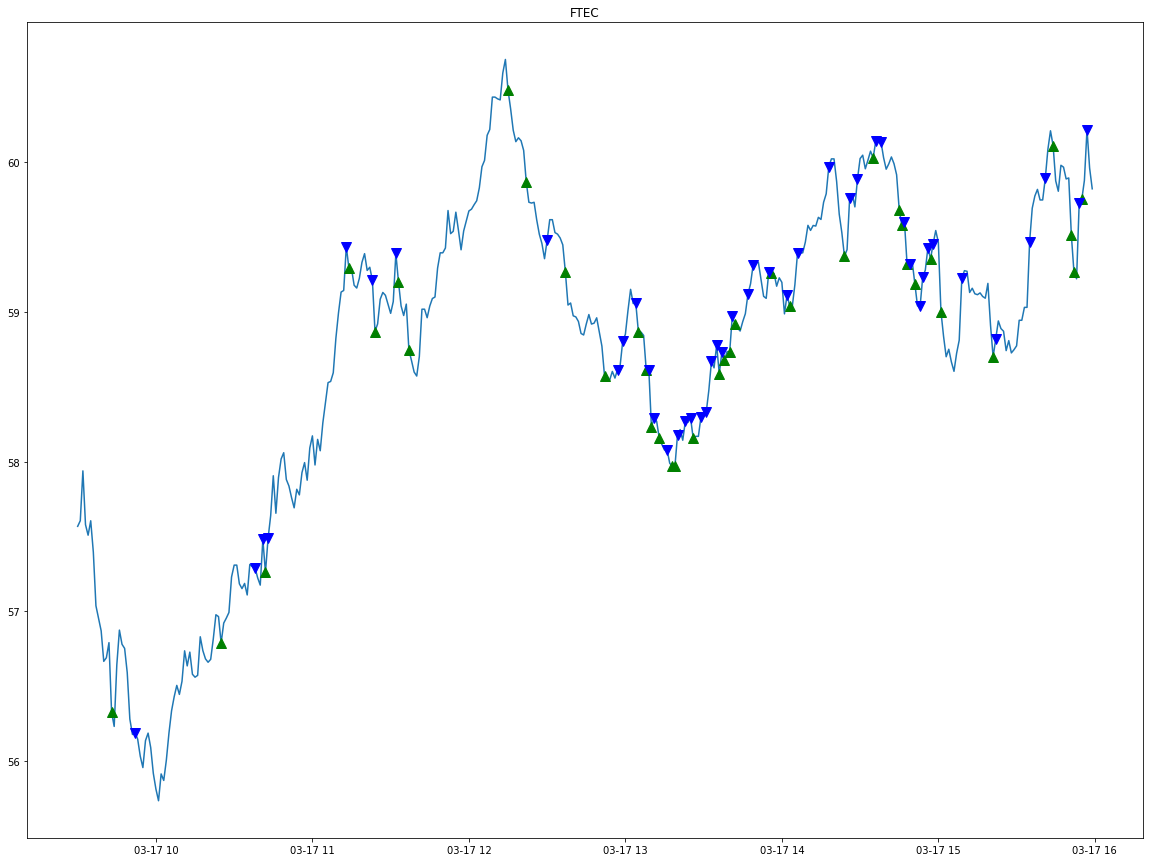

In [41]:
for i in listofetfs:
    df=pd.merge(arbitrageData[i],etfpricesData[i],on='Time',how='left')
    df=df.set_index('Time')

    etfOverSold = df.loc[df['Flag']== -111.0]
    etfOverBought = df.loc[df['Flag']== 111.0]
    plt.figure(figsize=(20,15))
    plt.plot(df.index,df['ETF Price'], label='ETF Price')
    plt.plot(etfOverSold.index, df.loc[etfOverSold.index]['ETF Price'], '^', markersize=10, color='g')
    plt.plot(etfOverBought.index, df.loc[etfOverBought.index]['ETF Price'], 'v', markersize=10, color='b')
    plt.title(i)
    plt.show()   